In [17]:
from img_doc.extractors.word_extractors import TesseractWordExtractor
from img_doc.extractors.word_extractors.word_bold_extractor import PsBoldExtractor
from img_doc.editors.binarizer import ValleyEmphasisBinarizer
import cv2
import numpy as np
from img_doc.data_structures import Image

In [2]:
import matplotlib.pyplot as plt

In [3]:
t = TesseractWordExtractor()

In [4]:
bold = PsBoldExtractor()

In [5]:
bi = ValleyEmphasisBinarizer()

In [6]:
image = Image()
image.set_img_from_path("img/10.png")

In [7]:
words = t.extract_from_img(image.img)
bold.extract(words, bi.binarize(image.img))


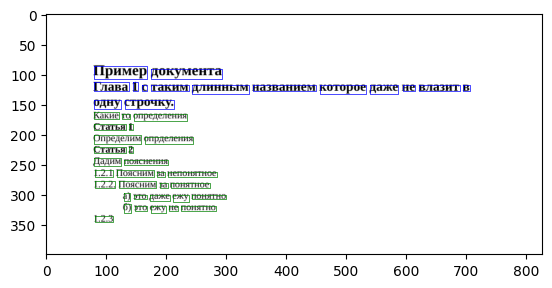

In [8]:
# plt.figure(dpi=300)
plt.imshow(image.img[:400, :])

for word in words:
    c  = "b" if word.bold == 1 else "g"
    x0 = word.segment.x_top_left
    y0 = word.segment.y_top_left
    x1 = word.segment.x_bottom_right
    y1 = word.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0], color=c, linewidth=0.5)

In [9]:
dim = 2*image.img.shape[1],2*image.img.shape[0] 
image2 = Image(img=cv2.resize(image.img, dim, cv2.INTER_AREA))

In [10]:
words2 = t.extract_from_img(image2.img)
bold.extract(words2, bi.binarize(image2.img))


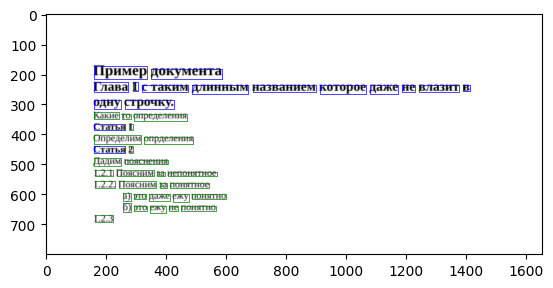

In [11]:
## plt.figure(dpi=300)
plt.imshow(image2.img[:800, :])

for word in words2:
    c  = "b" if word.bold == 1 else "g"
    x0 = word.segment.x_top_left
    y0 = word.segment.y_top_left
    x1 = word.segment.x_bottom_right
    y1 = word.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0], color=c, linewidth=0.5)

In [85]:
class Bold2(PsBoldExtractor):
    def evaluation_words(self, image: np.ndarray) -> float:
        H = 24
        c = H/image.shape[0]
        dim = (round(c*image.shape[1]),H)
        img=cv2.resize(image, dim, cv2.INTER_AREA)
        return super().evaluation_words(img)

In [86]:
bold2 = Bold2() # НЕ работает, выделяет много лишнего

In [87]:
words3 = t.extract_from_img(image.img)
bold2.extract(words3, bi.binarize(image.img))

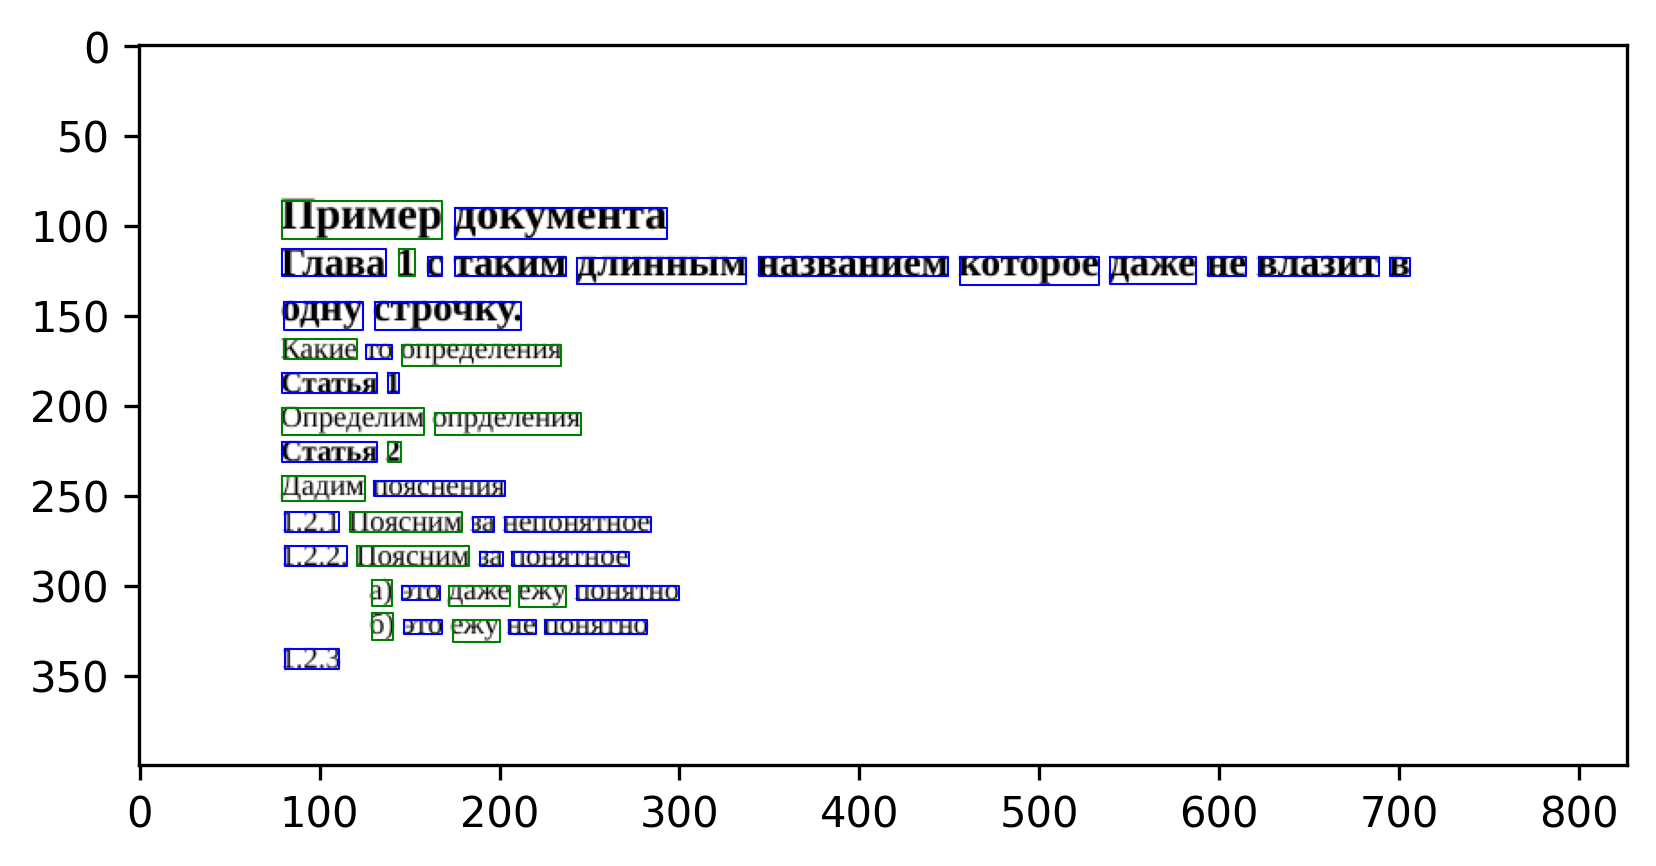

In [88]:
plt.figure(dpi=300)
plt.imshow((image.img)[:400, :])

for word in words3:
    c  = "b" if word.bold == 1 else "g"
    x0 = word.segment.x_top_left
    y0 = word.segment.y_top_left
    x1 = word.segment.x_bottom_right
    y1 = word.segment.y_bottom_right
    plt.plot([x0, x0, x1, x1, x0], [y0, y1, y1, y0, y0], color=c, linewidth=0.5)